In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf



In [4]:


# Define the stock ticker and the date range
ticker = 'AAPL'
start = '2010-01-01'
end = '2023-12-31'

# Fetch data using yfinance
df = yf.download(ticker, start=start, end=end)

# Display the first few rows of the data
print(df.head())


[*********************100%***********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.454505  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.465665  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.362822  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.351059  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.393281  447610800


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,192.868134,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.320221,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.419830,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,192.848206,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,191.802170,42628800


In [7]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465665,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362822,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351059,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800


In [9]:
df=df.drop(['Date', 'Adj Close'], axis=1)
df.head()


,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


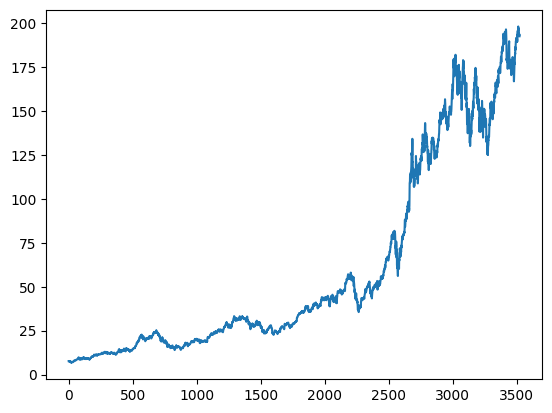

In [10]:
plt.plot(df.Close)


In [11]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3517    181.768301
3518    181.787101
3519    181.898701
3520    182.046001
3521    182.173301
Name: Close, Length: 3522, dtype: float64

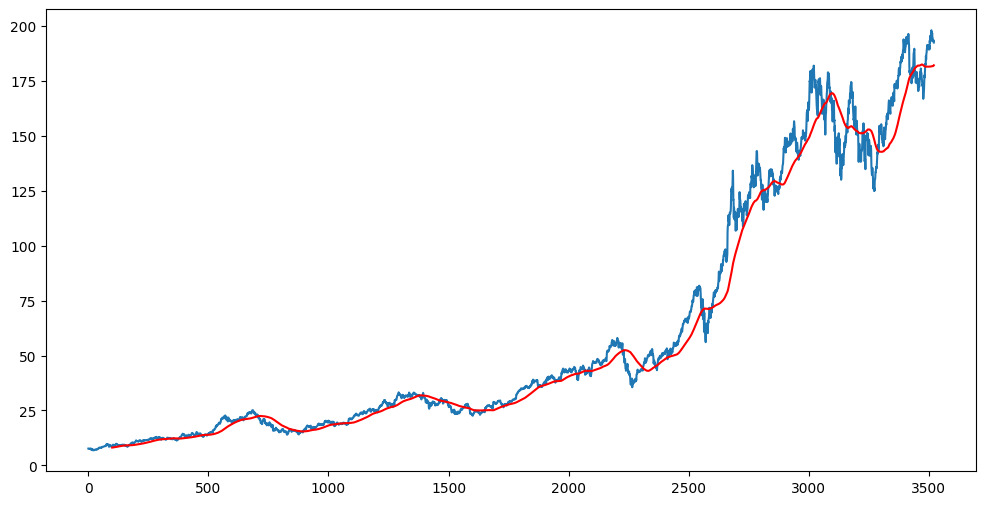

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [14]:
ma200=df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3517    178.649100
3518    178.871851
3519    179.085250
3520    179.290201
3521    179.487900
Name: Close, Length: 3522, dtype: float64

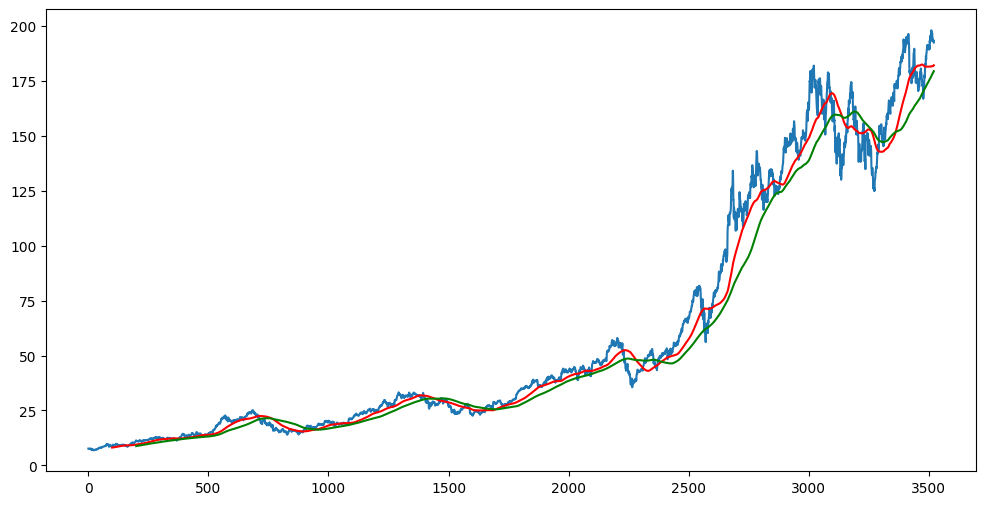

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200,'g')

In [16]:
df.shape


(3522, 5)

In [18]:
#splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(2465, 1)
(1057, 1)


In [19]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [20]:
data_testing.head()

,Close
2465,59.102501
2466,60.127499
2467,59.990002
2468,60.794998
2469,60.895000


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))



In [24]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01502647],
       [0.01527965],
       [0.01294631],
       ...,
       [0.99573703],
       [0.9911866 ],
       [0.99554539]])

In [26]:
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train , y_train = np.array(x_train), np.array(y_train)


In [28]:
#ML MODEL

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential 

In [30]:
model = Sequential()
model.add(LSTM(units =50, activation='relu', return_sequences= True,
               input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))

          
model.add(LSTM(units =60, activation='relu', return_sequences= True))
model.add(Dropout(0.3))


model.add(LSTM(units =80, activation='relu', return_sequences= True))
model.add(Dropout(0.4))


model.add(LSTM(units =120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units= 1))

In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs=50)


Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 15s 123ms/step - loss: 0.0657
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - loss: 0.0071
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - loss: 0.0069
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - loss: 0.0066
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - loss: 0.0059
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - loss: 0.0053
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - loss: 0.0049
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 0.0047
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 0.0051
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 0.0046
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - loss: 0.0044
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - loss: 0.0047
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - loss: 0.0044
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 161ms/step - loss: 0.0042
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 1

In [34]:
model.save('keras_model.h5')

In [35]:
data_testing.head()

,Close
2465,59.102501
2466,60.127499
2467,59.990002
2468,60.794998
2469,60.895000


In [36]:
past_100_days= data_training.tail(100)

In [42]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [43]:
final_df.head()

,Close
0,44.345001
1,44.575001
2,43.767502
3,43.325001
4,44.910000


In [46]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.00658979],
       [0.00807572],
       [0.00285881],
       ...,
       [0.96795551],
       [0.97073361],
       [0.96394998]])

In [48]:
input_data.shape

(1157, 1)

In [53]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [54]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1057, 100, 1)
(1057,)


In [55]:
#making predictions

y_predicted = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step


In [57]:
y_predicted.shape


(1057, 1)

In [61]:
scaler.scale_ # gives the scale down factor 

array([0.00646057])

In [62]:
scale_factor =1/0.00646057
y_predicted= y_predicted* scale_factor
y_test= y_test*scale_factor

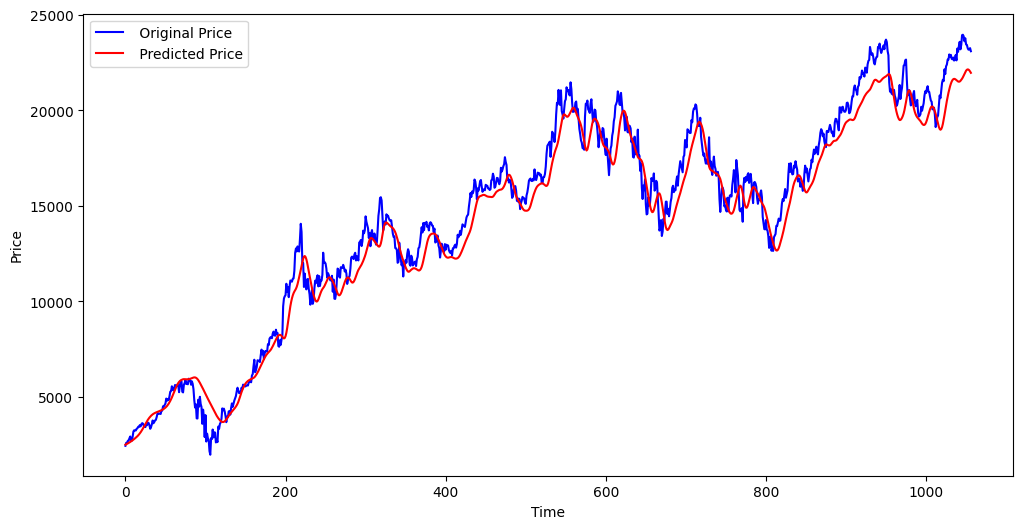

In [64]:
plt.figure( figsize= (12,6))
plt.plot(y_test, 'b', label =' Original Price')
plt.plot(y_predicted, 'r', label =' Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
